**USPS DATASET CLASSIFICATION**

**Group-15**

Group Members:

1.Satya Shah-1002161494

2.Harshita Dhingra-1002052823

3.Varad Nair-1002161475


In [1]:
from sklearn.neighbors import KNeighborsClassifier
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import numpy as np


In [2]:
with h5py.File('usps.h5', 'r') as f: #Provide your path 

    train = f['train']
    X_train = np.array(train['data'])  # Training features
    y_train = np.array(train['target'])  # Training labels
    test = f['test']
    X_test = np.array(test['data'])  # Testing features
    y_test = np.array(test['target'])  # Testing labels

**HISTOGRAM OF ORIENTED GRADIENTS FOR FEATURE EXTRACTION**

In [3]:
from skimage.feature import hog

# Extract HOG features
X_train = np.array([hog(img.reshape(16, 16), pixels_per_cell=(4,4), cells_per_block=(2,2)) for img in X_train])
X_test = np.array([hog(img.reshape(16, 16), pixels_per_cell=(4,4), cells_per_block=(2,2)) for img in X_test])




In [4]:
X_train.shape

(7291, 324)

In [5]:
y_train.shape

(7291,)

In [6]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3051038 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01930265, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27010828, 0.22500879, 0.20853613, ..., 0.        , 0.        ,
        0.        ],
       [0.14187327, 0.35852572, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(7291, 324), dtype=float32)

In [7]:
# The data is not imbalanced
# Concatenate y_train and y_test
y_combined = np.concatenate([y_train, y_test])

# Get unique classes and their counts
unique_classes, class_counts = np.unique(y_combined, return_counts=True)

# Print the frequency of each class
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} occurrences")


Class 0: 1553 occurrences
Class 1: 1269 occurrences
Class 2: 929 occurrences
Class 3: 824 occurrences
Class 4: 852 occurrences
Class 5: 716 occurrences
Class 6: 834 occurrences
Class 7: 792 occurrences
Class 8: 708 occurrences
Class 9: 821 occurrences


In [8]:
y_train

array([6, 5, 4, ..., 3, 0, 1], shape=(7291,), dtype=int32)

**KNN**

In [9]:
# k_list = []
# k_CV_Score = []

neighbor_values = []
cross_val_results = []

In [10]:

# Iterating through values of k from 6 to 40
k_value = 6
while k_value <= 40:
    neighbor_values.append(k_value)
    
    # Initializing KNN with current k value
    knn_model = KNeighborsClassifier(n_neighbors=k_value, n_jobs=-1)
    
    # Computing cross-validation scores using 10-fold CV
    cv_accuracy = cross_val_score(knn_model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)
    
    # Storing mean cross-validation score
    cross_val_results.append(cv_accuracy.mean())
    
    # Incrementing k value for next iteration
    k_value += 1

In [11]:

# Finding the best k value with the highest cross-validation accuracy
optimal_k = neighbor_values[np.argmax(cross_val_results)]

# Initializing and training KNN with the best k value
optimal_knn_model = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
optimal_knn_model.fit(X_train, y_train)

# Making predictions on test data
predicted_labels = optimal_knn_model.predict(X_test)

In [12]:
import numpy as np

# Converting NumPy float64 values to standard Python floats
cross_val_results = [float(score) for score in cross_val_results]

# Displaying cross-validation results
print("\nCross-validation results for k values:")
print("k values:", neighbor_values)
print("\nCross-validation scores for 10 folds:", cross_val_results)
print("\nOptimal k value:", optimal_k)



Cross-validation results for k values:
k values: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

Cross-validation scores for 10 folds: [0.968454629159855, 0.9648888513069132, 0.965300373940658, 0.9624195275945656, 0.9654377360617848, 0.9629684123494373, 0.9633797470733038, 0.963379934983182, 0.962145554991826, 0.9596769829189921, 0.9603628539752334, 0.9577567318713947, 0.9589909239528722, 0.9570710487250315, 0.9588539376515024, 0.9561106413364151, 0.9576197455700248, 0.9562480034575417, 0.9574825713587763, 0.9555623203111787, 0.9559738429449236, 0.9547392750436892, 0.9552879718886823, 0.9537790555649511, 0.9541905781986959, 0.9532305466298363, 0.9535050829622114, 0.9525448634834731, 0.9529565740270967, 0.9521333408497284, 0.9513106714019954, 0.951172933461112, 0.9504880019542628, 0.9500762914106394, 0.9504880019542629]

Optimal k value: 6


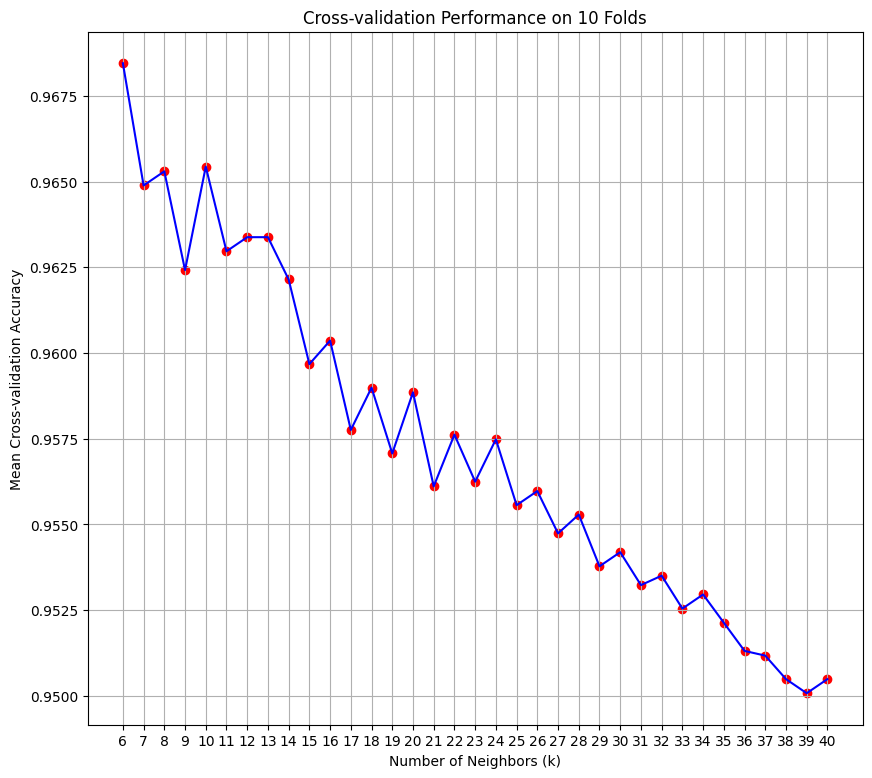

In [13]:

# Plotting k values vs. cross-validation scores with a line connecting the dots
plt.figure(figsize=(10, 9))
plt.scatter(neighbor_values, cross_val_results, marker='o', color='red')  # Scatter plot
plt.plot(neighbor_values, cross_val_results, color='blue')  # Line connecting the dots
plt.title('Cross-validation Performance on 10 Folds')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-validation Accuracy')
plt.xticks(neighbor_values)
plt.grid(True)
plt.show()


In [14]:
# Computing confusion matrix, precision, and recall
conf_matrix_result = confusion_matrix(y_test, predicted_labels)
precision_score_result = precision_score(y_test, predicted_labels, average="weighted")
recall_score_result = recall_score(y_test, predicted_labels, average="weighted")

# Displaying confusion matrix, precision, and recall results
print("\nConfusion Matrix:")
print(conf_matrix_result)

print("\nPrecision:", precision_score_result)
print("Recall:", recall_score_result)



Confusion Matrix:
[[356   0   2   0   0   0   0   0   0   1]
 [  0 260   0   0   1   0   1   0   0   2]
 [ 10   1 182   0   1   1   0   3   0   0]
 [  3   0   0 156   0   3   1   0   2   1]
 [  0   3   3   0 173   0   2   0   0  19]
 [  1   1   0   4   0 154   0   0   0   0]
 [  2   0   0   0   1   1 166   0   0   0]
 [  0   2   2   0   7   0   0 135   0   1]
 [  6   1   0   4   1   0   3   1 147   3]
 [  1   0   0   0   1   0   0   2   1 172]]

Precision: 0.9483950185532224
Recall: 0.9471848530144494


In [15]:

# Computing and displaying model accuracy on test data
knn_accuracy = optimal_knn_model.score(X_test, y_test)
print(f"KNN Classifier Accuracy: {knn_accuracy:.2%}")

KNN Classifier Accuracy: 94.72%


**NAIVE BAYES**

In [16]:
print(f"X_train:{X_train.shape}")
print(f"y_train:{y_train.shape}")

X_train:(7291, 324)
y_train:(7291,)


In [17]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

# Initializing Naive Bayes classifier
nb = GaussianNB(var_smoothing=0.05071850173206816) #Var Smoothing based on Optuna, library for hyperparameter tuning


# Performing 10-fold cross-validation and getting accuracy scores for each fold
cv_scores = cross_val_score(nb, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)

for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

print(f"\nMean Accuracy (10-fold CV): {cv_scores.mean():.4f}")


Fold 1: Accuracy = 0.9356
Fold 2: Accuracy = 0.9410
Fold 3: Accuracy = 0.9218
Fold 4: Accuracy = 0.9355
Fold 5: Accuracy = 0.9383
Fold 6: Accuracy = 0.9396
Fold 7: Accuracy = 0.9520
Fold 8: Accuracy = 0.9355
Fold 9: Accuracy = 0.9314
Fold 10: Accuracy = 0.9273

Mean Accuracy (10-fold CV): 0.9358


In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Fit the model on training data
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# 1. Accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Data: {accuracy:.4f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# 3. Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted for multi-class

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy on Test Data: 0.9123

Confusion Matrix:
[[343   1   4   4   2   5   0   0   0   0]
 [  0 257   1   0   3   0   3   0   0   0]
 [  4   0 174   5   4   1   1   1   7   1]
 [  1   0   2 149   0   7   0   0   7   0]
 [  0   1   4   0 157   0   1   0   2  35]
 [  1   0   0   3   0 148   0   0   7   1]
 [  1   0   2   0   3   6 157   0   1   0]
 [  0   1   2   0   6   0   0 132   2   4]
 [  1   1   1   8   2   1   1   0 149   2]
 [  1   0   1   0   3   0   0   6   1 165]]

Precision: 0.9149
Recall: 0.9123


**Optuna**

In [19]:
# !pip install optuna

In [20]:
# import optuna
# def objective(trial):
#     var_smoothing = trial.suggest_loguniform("var_smoothing", 1e-9, 1.0)

#     nb = GaussianNB(var_smoothing=var_smoothing)

#     # Performin 10-fold cross-validation
#     cv_scores = cross_val_score(nb, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)

#     return cv_scores.mean()

# # Create an Optuna study to find the best var_smoothing
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)  # Run 50 trials (you can adjust this)

# # Getting the best parameter
# best_var_smoothing = study.best_params["var_smoothing"]
# print(f"Best var_smoothing: {best_var_smoothing}")

# # Training GaussianNB with the best var_smoothing on full training data
# best_nb = GaussianNB(var_smoothing=best_var_smoothing)
# best_nb.fit(X_train, y_train)

# # Getting test accuracy
# test_accuracy = best_nb.score(X_test, y_test)
# print(f"Test Accuracy with best var_smoothing: {test_accuracy:.4f}")